In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.io import loadmat

sns.set_style('whitegrid')

In [112]:
xs = loadmat('HW3-1.mat')['signal'].flatten()

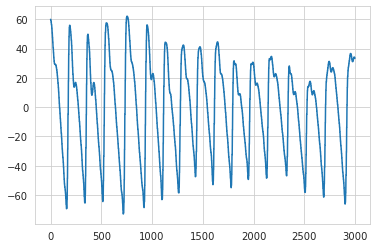

In [113]:
plt.plot(xs)

In [114]:
psd = np.abs(np.fft.fft(xs)) ** 2

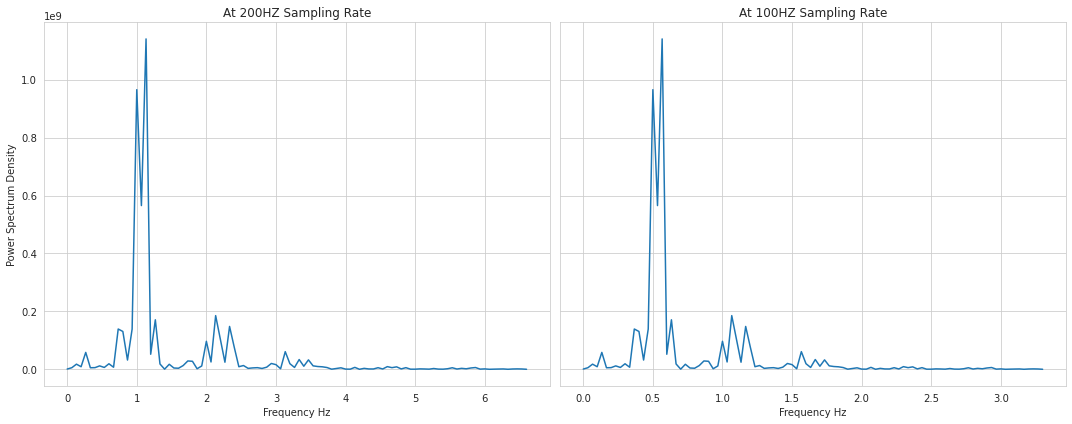

In [116]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 6), sharey=True)

ax[0].plot(np.fft.fftfreq(3000, 1/200)[:100], psd[:100])
ax[1].plot(np.fft.fftfreq(3000, 1/100)[:100], psd[:100])

ax[0].set_xlabel('Frequency Hz')
ax[0].set_ylabel('Power Spectrum Density')
ax[0].set_title('At 200HZ Sampling Rate')
ax[1].set_xlabel('Frequency Hz')
ax[1].set_title('At 100HZ Sampling Rate')
fig.tight_layout()
fig.show()

In [86]:
np.random.seed(562398)

xs = list(np.random.standard_normal(4))

for i in range(4, 1000):
    x = xs[i-4] * -0.99 + np.random.standard_normal()
    xs.append(x)

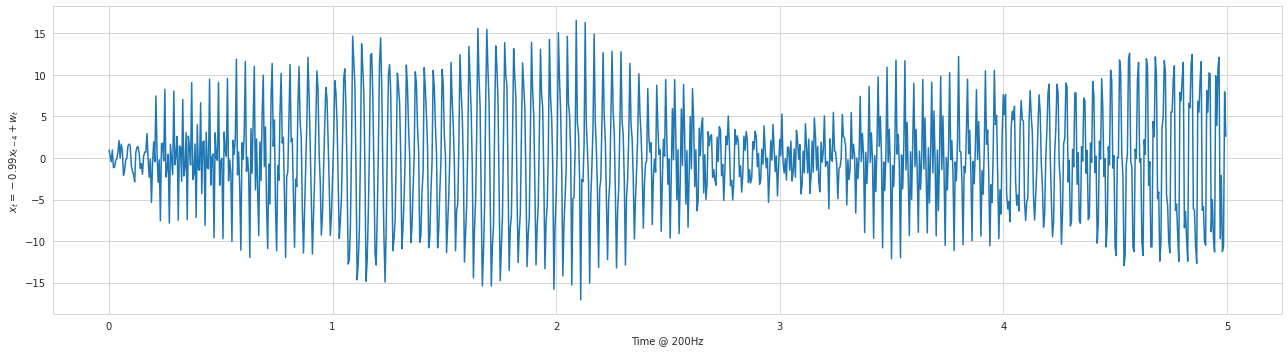

In [99]:
fig, ax = plt.subplots(figsize=(18, 5))

ax.plot(np.arange(1000)/200, xs)
ax.set_xlabel('Time @ 200Hz')
ax.set_ylabel('$x_t = -0.99 x_{t-4} + w_t$')

fig.tight_layout()
fig.show()

In [100]:
def to_complex_polar(x):
    r = np.sqrt(x.real**2 + x.imag**2)
    theta = np.arctan(x.imag / x.real)
    return r, theta

A = np.array([
    [0, 0, 0, -0.99],
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 1, 0]
])
lam, T = np.linalg.eig(A)
r, theta = to_complex_polar(lam)
wavelength = 2*np.pi / theta

In [101]:
r, theta

(array([0.99749057, 0.99749057, 0.99749057, 0.99749057]),
 array([-0.78539816,  0.78539816,  0.78539816, -0.78539816]))

In [110]:
1/wavelength * 200

array([-25.,  25.,  25., -25.])

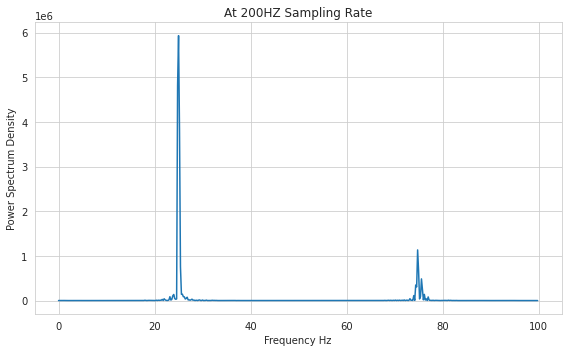

In [111]:
psd = np.abs(np.fft.fft(xs)) ** 2

fig, ax = plt.subplots(figsize=(8, 5), sharey=True)

ax.plot(np.fft.fftfreq(1000, 1/200)[:500], psd[:500])

ax.set_xlabel('Frequency Hz')
ax.set_ylabel('Power Spectrum Density')
ax.set_title('At 200HZ Sampling Rate')
fig.tight_layout()
fig.show()